<a href="https://colab.research.google.com/github/zainab2303/Amazon_Toy_Recommendation/blob/main/AML_Project_Deliverable_3_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0) Setup

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Note: To run this line, you may need to download the dataset and upload the CSV to your Colab Runtime.
# Data: https://www.kaggle.com/datasets/PromptCloudHQ/toy-products-on-amazon/data
amazon_data_raw = pd.read_csv('amazon_co-ecommerce_sample.csv')

In [ ]:
amazon_data_raw.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


# 1) Data Exploration, Cleaning, and Preprocessing

In [ ]:
# Preserve a copy of our raw data and create a variable to store our processed data:
amazon_data_processed = amazon_data_raw

In [ ]:
# We can get a sense of the preprocessing required by inspectin the data's shape
amazon_data_processed.shape

(10000, 17)

In [ ]:
# We can get a sense of some of the necessary data prepocessing tasks by taking a look at the degree of missingness in the dataset:
print("Percent of Missing Rows per Feature:")
print(((amazon_data_processed.isnull().sum() / amazon_data_processed.shape[0]) * 100).sort_values(ascending=False))

Percent of Missing Rows per Feature:
customer_questions_and_answers                 90.86
sellers                                        30.82
items_customers_buy_after_viewing_this_item    30.65
number_available_in_stock                      25.00
price                                          14.35
customers_who_bought_this_item_also_bought     10.62
number_of_answered_questions                    7.65
amazon_category_and_sub_category                6.90
description                                     6.51
product_description                             6.51
product_information                             0.58
customer_reviews                                0.21
average_review_rating                           0.18
number_of_reviews                               0.18
manufacturer                                    0.07
product_name                                    0.00
uniq_id                                         0.00
dtype: float64


In [ ]:
# We should drop the ID column, as unique identifiers are generally generated in a manner uncorrelated with the underlying data
amazon_data_processed = amazon_data_processed.drop(columns=['uniq_id'])

### 1.1 Numeric Features

Preprocessing our numeric columns is a two step process:
- <b>Cleaning</b>: To clean our numeric columns, we strip any non-numeric data and convert to a numeric type.
- <b>Inputation</b>: Imputing missing values.

In [ ]:
# Our dataset contains 5 numeric columns
numeric_columns = ["price", "number_available_in_stock", "number_of_reviews", "number_of_answered_questions", "average_review_rating"]

In [ ]:
# Initially, most of our columns are parsed by default as strings, including columns which contain useful numerical data.
# We can start our data preprocessing by cleaning and casting these columns to numeric types.
print("Numeric Features by Type (Before Pre-Processing):")
amazon_data_raw[numeric_columns].dtypes

Numeric Features by Type (Before Pre-Processing):


price                            object
number_available_in_stock        object
number_of_reviews                object
number_of_answered_questions    float64
average_review_rating            object
dtype: object

In [ ]:
# Simply convert number_of_reviews
amazon_data_processed['number_of_reviews'] =  pd.to_numeric(amazon_data_processed['number_of_reviews'].str.replace(',', ''))

In [ ]:
# Simply convert number_of_answered_questions
amazon_data_processed['number_of_answered_questions'] = pd.to_numeric(amazon_data_processed['number_of_answered_questions'])

In [ ]:
# Clean the "price" field by stripping leading '£' and all commmas
amazon_data_processed['price'] = amazon_data_processed['price'].str.replace('£', '')
amazon_data_processed['price'] = amazon_data_processed['price'].str.replace(',', '')

# Some prices include a range (Ex: 6.99 - 10.49), so we impute the average of the range:
for idx, value in amazon_data_processed['price'].items():
    if "-" in str(value):
        value_range = [float(match) for match in re.findall(r'\d+\.\d+', value)]
        average_value = sum(value_range) / len(value_range)
        amazon_data_processed.loc[idx, 'price'] = average_value

amazon_data_processed['price'] = pd.to_numeric(amazon_data_processed['price'])

In [ ]:
# Clean the "average_review_rating" by stripping trailing text"
amazon_data_processed['average_review_rating'] = pd.to_numeric(amazon_data_raw['average_review_rating'].str.replace('out of 5 stars', ''))

In [ ]:
# Strip descriptive strings about the quality of items in stock
amazon_data_processed['number_available_in_stock'] = amazon_data_processed['number_available_in_stock'].str.replace('new', '')
amazon_data_processed['number_available_in_stock'] = amazon_data_processed['number_available_in_stock'].str.replace('used', '')
amazon_data_processed['number_available_in_stock'] = amazon_data_processed['number_available_in_stock'].str.replace('collectible', '')
amazon_data_processed['number_available_in_stock'] = amazon_data_processed['number_available_in_stock'].str.replace('refurbished', '')
amazon_data_processed['number_available_in_stock'] = amazon_data_processed['number_available_in_stock'].str.strip()
amazon_data_processed['number_available_in_stock'] = pd.to_numeric(amazon_data_processed['number_available_in_stock'])

In [ ]:
# We can see that our numeric columns have been caste to floats:
print("Numeric Features by Type (After Pre-Processing):")
amazon_data_processed[numeric_columns].dtypes

Numeric Features by Type (After Pre-Processing):


price                           float64
number_available_in_stock       float64
number_of_reviews               float64
number_of_answered_questions    float64
average_review_rating           float64
dtype: object

In [ ]:
# We can validate that we have not thrown away any data as part of our type conversion:
print("Number of Missing Rows per Numeric Feature (Before Cleaning):")
print((amazon_data_raw[numeric_columns].isnull().sum()).sort_values(ascending=False))
print("\nNumber of Missing Rows per Numeric Feature (After Cleaning):")
print((amazon_data_processed[numeric_columns].isnull().sum()).sort_values(ascending=False))

Number of Missing Rows per Numeric Feature (Before Cleaning):
number_available_in_stock       2500
price                           1435
number_of_answered_questions     765
number_of_reviews                 18
average_review_rating             18
dtype: int64

Number of Missing Rows per Numeric Feature (After Cleaning):
number_available_in_stock       2500
price                           1435
number_of_answered_questions     765
number_of_reviews                 18
average_review_rating             18
dtype: int64


In [ ]:
# There is still quite a bit of data missing data for numeric features, which we can resolve with imputation.
print("Percent of Missing Rows per Numeric Feature (Before Imputation):")
print(((amazon_data_processed[numeric_columns].isnull().sum() / amazon_data_processed[numeric_columns].shape[0]) * 100).sort_values(ascending=False))

Percent of Missing Rows per Numeric Feature (Before Imputation):
number_available_in_stock       25.00
price                           14.35
number_of_answered_questions     7.65
number_of_reviews                0.18
average_review_rating            0.18
dtype: float64


In [ ]:
# For the remaining numeric columns, we can do a simple imputation using the median value:
for column_name in numeric_columns:
    median = amazon_data_processed[column_name].median()
    amazon_data_processed[column_name].fillna(median, inplace=True)

# TODO - We could also use more sophisticated imputation strategies such as a KNN, but that is likely not necessary here.

In [ ]:
# We can validate that we have imputed all missing values:
print("\nPercent of Missing Rows per Numeric Feature (After Imputation):")
print(((amazon_data_processed[numeric_columns].isnull().sum() / amazon_data_processed[numeric_columns].shape[0]) * 100).sort_values(ascending=False))


Percent of Missing Rows per Numeric Feature (After Imputation):
price                           0.0
number_available_in_stock       0.0
number_of_reviews               0.0
number_of_answered_questions    0.0
average_review_rating           0.0
dtype: float64


#### Visualizing Numeric Features:
- We can see that there is a high degree of skew in our numerical features, which highlights the importance of scalign and centering this data when we build our models.

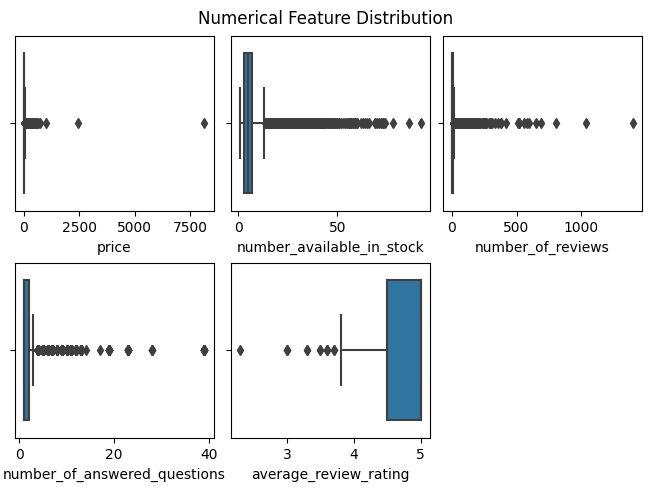

In [ ]:
# Create plots in 2x2 grid and add a title
figure, axes = plt.subplots(2, 3, layout="constrained")
figure.suptitle('Numerical Feature Distribution')

# Flatten the plots array for easy iteration
axes = axes.flatten()

# We have an odd number of axes, so just remove the last one
figure.delaxes(axes[-1])

for idx, column in enumerate(numeric_columns):
    sns.boxplot(x=amazon_data_processed[column], ax=axes[idx])

#### Correlation of Numerical Features:
- We can see that there is a low degree of correlation between our numeric features, which may imply that these features are independently useful, particularly for models that are susceptible to multicollinearity.

In [ ]:
# Define a function that we can use later
def plot_correlation_matrix(input_X):
    # Get the correlation matrix
    corr_matrix = input_X.corr()

    # We can easily plot the correlation matrix using Matplotlib's matshow
    figure, axes = plt.subplots()
    correlation_axes = axes.matshow(corr_matrix)

    # Add labels
    axis = np.arange(len(list(corr_matrix.columns)))
    axes.set_xticks(axis, list(corr_matrix.columns), rotation=90)
    axes.set_yticks(axis, list(corr_matrix.columns))

    # Add a legend and title
    figure.colorbar(correlation_axes)
    figure.suptitle('Numerical Feature Correlation Matrix', y=1.45)

    # Show the plot
    plt.show()

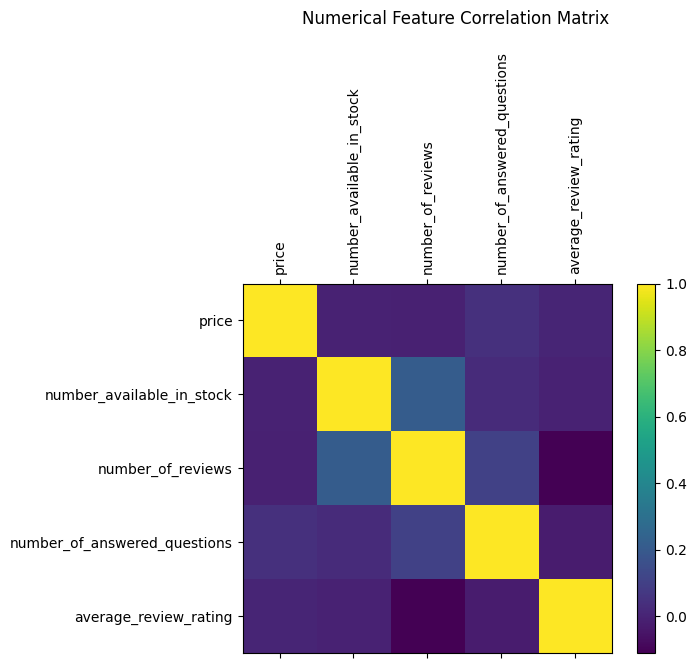

In [ ]:
# Plot the matrix
plot_correlation_matrix(amazon_data_processed[numeric_columns])

### 1.2 Categorical Features

In [ ]:
# To process the amazon_category_and_sub_category we can use the parent category and impute the mode for missing samples,
# and drop the original column.
amazon_data_processed['category'] = amazon_data_raw['amazon_category_and_sub_category'].str.split(' > ').str[0]
amazon_data_processed['category'] = amazon_data_processed['category'].fillna(amazon_data_processed.mode()['category'][0])
amazon_data_processed = amazon_data_processed.drop(columns=['amazon_category_and_sub_category'])

# TODO:
# - Should we map this as a OHE? If so, this would introduces a lot of dimensions?
# - This method throws away a good bit of useful information in the subcategorization.
#   - We could add columns for (category_1, category_2, ...) and recursively impute the mode of children for each parent category?

In [ ]:
# We can simply impute the mode for our 'manufacturer' column to account for missing data:
amazon_data_processed['manufacturer'] = amazon_data_processed['manufacturer'].fillna(amazon_data_processed.mode()['manufacturer'][0])

# TODO:
# - Should we map this as a OHE? If so, this would introduces a lot of dimensions?

- <b>Cardinality of Categorical Featues:</b> We can see that there is high cardinality in our categorical values even by plotting just the top 20 of each category. We'll need to be careful to encode our categorical features without introducing too many dimensions.

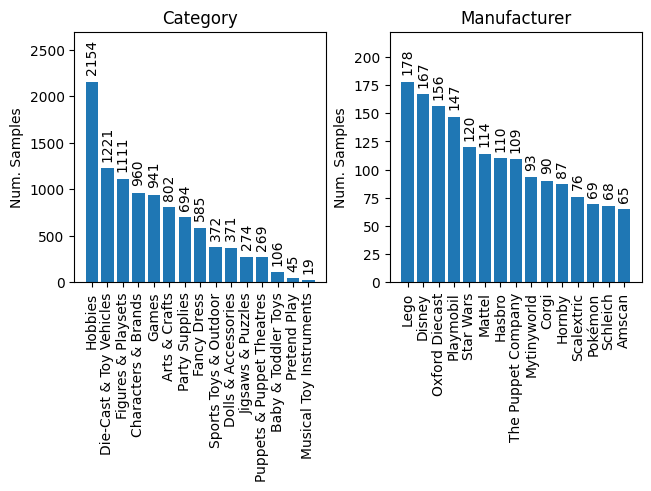

In [ ]:
categorical_features = ['category', 'manufacturer']

# Create plots in 2x2 grid
figure, axes = plt.subplots(1, 2, layout="constrained")

# Flatten the plots array for easy iteration
axes = axes.flatten()

# Iterate over each column, add bars for values
for idx, column in enumerate(categorical_features):
    # Extract the counts for the column's categories
    value_counts = amazon_data_processed[column].value_counts().nlargest(15)

    # Draw values
    bars = axes[idx].bar(value_counts.keys(), value_counts.values)

    # Set ticks and labels
    axes[idx].bar_label(bars, rotation=90, padding=5)
    axes[idx].set_ylabel('Num. Samples')
    axes[idx].set_title(column.title().replace("_", " ")) # Formatting

    # Add some nice formatting for x-axis
    formatted_keys = [category_name.title() for category_name in value_counts.keys()]
    axes[idx].set_xticks(value_counts.keys(), formatted_keys, rotation=90)

    # Add a bit of y-axis padding to account for counts on bars
    axes[idx].set_ylim(0, max(value_counts.values) * 1.25)

# Show the plot
plt.show()

# References:
# - https://matplotlib.org/stable/gallery/statistics/hist.html
# - https://matplotlib.org/stable/gallery/subplots_axes_and_figures/demo_constrained_layout.html

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One simple strategy to represent our categorical features without introducing
# too many extra dimensions is to cap the number of categories.
def process_categorical_variables(df, categorica_column_names, max_categories=20):
    encoder = OneHotEncoder(max_categories=max_categories)
    transformed_df = encoder.fit_transform(df[categorica_column_names])
    df[encoder.get_feature_names_out(categorica_column_names)] = transformed_df.toarray()
    return df.drop(columns=categorica_column_names, axis=1)

amazon_data_processed = process_categorical_variables(amazon_data_processed, categorical_features)

# TODOs:
# - There are many more sophisticated strategies to handle high cardinality categorical columns w/o introducing the curse of
# dimensionality: target encoding, entity embeddings, CatBoost, etc.

In [ ]:
# TODO: customers_who_bought_this_item_also_bought and items_customers_buy_after_viewing_this_item

# TODO:
# - Ultimately, this data represents a graph structure that we could model in interesting ways.
# - We could extract the IDs for each and then create a OHE for whether the item is included in

### 1.3 Text Features

In [ ]:
# We can drop columns with significant missingness that cannot be imputed and contain little predictive value:
columns_to_drop = ['customer_questions_and_answers', 'sellers']

print("Percent of Missing Rows:")
print(((amazon_data_processed[columns_to_drop].isnull().sum() / amazon_data_processed[columns_to_drop].shape[0]) * 100).sort_values(ascending=False))

# Drop the missing columns
amazon_data_processed = amazon_data_processed.drop(columns=columns_to_drop)

Percent of Missing Rows:
customer_questions_and_answers    90.86
sellers                           30.82
dtype: float64


In [ ]:
# We can drop rows from columns with low levels of missingness but critical predictive value:
columns_to_keep = ['description', 'product_information', 'product_description', 'customer_reviews']

print("Percent of Missing Rows (Before Dropping Null Rows):")
print(((amazon_data_processed[columns_to_keep].isnull().sum() / amazon_data_processed[columns_to_keep].shape[0]) * 100).sort_values(ascending=False))

amazon_data_processed = amazon_data_processed.dropna(subset=columns_to_keep)

Percent of Missing Rows (Before Dropping Null Rows):
description            6.51
product_description    6.51
product_information    0.58
customer_reviews       0.21
dtype: float64


In [ ]:
# We can fill the remaining text columns with the empty string:
fill_with_empty_strings_columns = ['customers_who_bought_this_item_also_bought', 'items_customers_buy_after_viewing_this_item']
amazon_data_processed[fill_with_empty_strings_columns] = amazon_data_processed[fill_with_empty_strings_columns].fillna('')

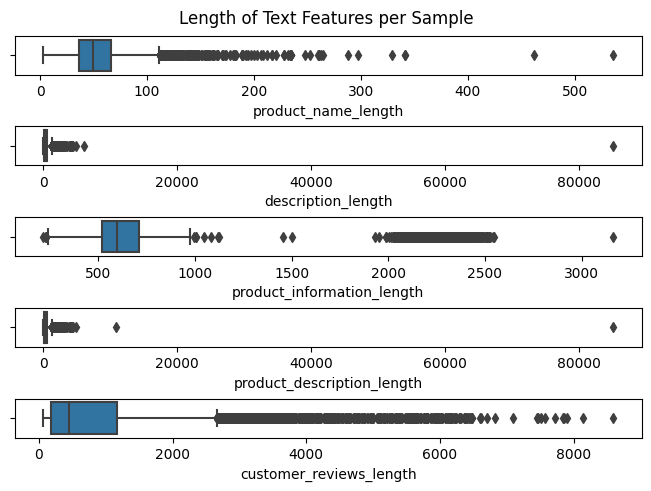

In [ ]:
# We can see that there is quite a skewed variance in the presence of text data across our samples.
free_form_text_graph_df = pd.DataFrame()
raw_text_colunmns = ['product_name', 'description', 'product_information', 'product_description', 'customer_reviews']

for column_name in raw_text_colunmns:
    free_form_text_graph_df['{}_length'.format(column_name)] = amazon_data_processed[column_name].str.count('.')
    free_form_text_graph_df['{}_length'.format(column_name)] = amazon_data_processed[column_name].str.count('.')
    free_form_text_graph_df['{}_length'.format(column_name)] = amazon_data_processed[column_name].str.count('.')

# Create plots
figure, axes = plt.subplots(len(raw_text_colunmns), 1, layout="constrained")
figure.suptitle('Length of Text Features per Sample')

# Flatten the plots array for easy iteration
axes = axes.flatten()

for idx, column_name in enumerate(raw_text_colunmns):
    sns.boxplot(x=free_form_text_graph_df["{}_length".format(column_name)], ax=axes[idx])

In [ ]:
# To use our text features, we'll also need to do some cleaning to strip out stop words and special characters,
# as well as stem and/or lemmatize our text.
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import datetime

stemmer = PorterStemmer()

def process_text(text):
    # Convert to lowercase
    text = text.lower()
    # Strip special chars
    text = re.sub(r"[^a-zA-Z0-9]+", ' ', text)
    # Tokenize
    token_words = word_tokenize(text)
    # Strip stop words
    stripped_words = [word for word in token_words if word not in stopwords.words('english')]
    # Stem
    stemmed_text = [stemmer.stem(word) for word in stripped_words]
    # Join and return
    return " ".join(stemmed_text)

# TODOs:
# - We could improve this logic using lemmatization, which outperforms simple stemming.

In [ ]:
# One simple strategy to process our raw text data is to concatenate our text features to a single text feature.
# Later, we can use this single feature to construct more complex text representations, such as bag of words, TF-IDF, and text hashing.
raw_text_colunmns = ['product_name', 'description', 'product_information', 'product_description', 'customer_reviews']

# Process our text data
amazon_data_processed['raw_text'] = amazon_data_processed[raw_text_colunmns].agg(' '.join, axis=1)
amazon_data_processed['raw_text'] = amazon_data_processed['raw_text'].apply(process_text)

# Drop the original features
amazon_data_processed = amazon_data_processed.drop(columns=raw_text_colunmns)

# TODOs:
# - Perhaps there are improvements to this simple strategy to concatenate our text features?

### 1.4 Data Cleaing Summary:

In [ ]:
# At this point, we have either removed or imputed values for every feature, so we have no missingness:
print("Percent of Missing Rows per Feature:\n")
print(((amazon_data_processed.isnull().sum() / amazon_data_processed.shape[0]) * 100).sort_values(ascending=False))

Percent of Missing Rows per Feature:

price                                          0.0
number_available_in_stock                      0.0
category_infrequent_sklearn                    0.0
manufacturer_Amscan                            0.0
manufacturer_Corgi                             0.0
manufacturer_Disney                            0.0
manufacturer_Every-occasion-party-supplies     0.0
manufacturer_FunKo                             0.0
manufacturer_Hasbro                            0.0
manufacturer_Hornby                            0.0
manufacturer_LEGO                              0.0
manufacturer_Mattel                            0.0
manufacturer_Melissa & Doug                    0.0
manufacturer_MyTinyWorld                       0.0
manufacturer_Oxford Diecast                    0.0
manufacturer_Papo                              0.0
manufacturer_Playmobil                         0.0
manufacturer_Pokémon                           0.0
manufacturer_Scalextric                     

In [ ]:
# We can visualize and inspect our processed data:
amazon_data_processed.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,category_Arts & Crafts,category_Baby & Toddler Toys,category_Characters & Brands,...,manufacturer_Oxford Diecast,manufacturer_Papo,manufacturer_Playmobil,manufacturer_Pokémon,manufacturer_Scalextric,manufacturer_Schleich,manufacturer_Star Wars,manufacturer_The Puppet Company,manufacturer_infrequent_sklearn,raw_text
0,3.42,5.0,15.0,1.0,4.9,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hornbi 2014 catalogu product descript hornbi 2...
1,16.99,5.0,2.0,1.0,4.5,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,funkybuy larg christma holiday express festiv ...
2,9.99,2.0,17.0,2.0,3.9,http://www.amazon.co.uk/Classic-Train-Lights-B...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,classic toy train set track carriag light engi...
3,39.99,5.0,1.0,2.0,5.0,,,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hornbi coach r4410a br hawksworth corridor 3rd...
4,32.19,5.0,3.0,2.0,4.7,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hornbi 00 gaug 0 4 0 gildenlow salt co steam l...


# 2) Applied Machine Learning Methods

#### 1. Topic Modelling with Latent Dirichlet Allocation

In [ ]:
# Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# To encode our text features for use, we can represent our text features as a TF-IDF matrix.
vectorizer = TfidfVectorizer(stop_words='english', min_df=5)
tf_idf_matrix = vectorizer.fit_transform(amazon_data_processed['raw_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=10, learning_method="batch")
X_lda = lda.fit_transform(tf_idf_matrix)

In [ ]:
def plot_top_words_per_topic(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Reference:
# - https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

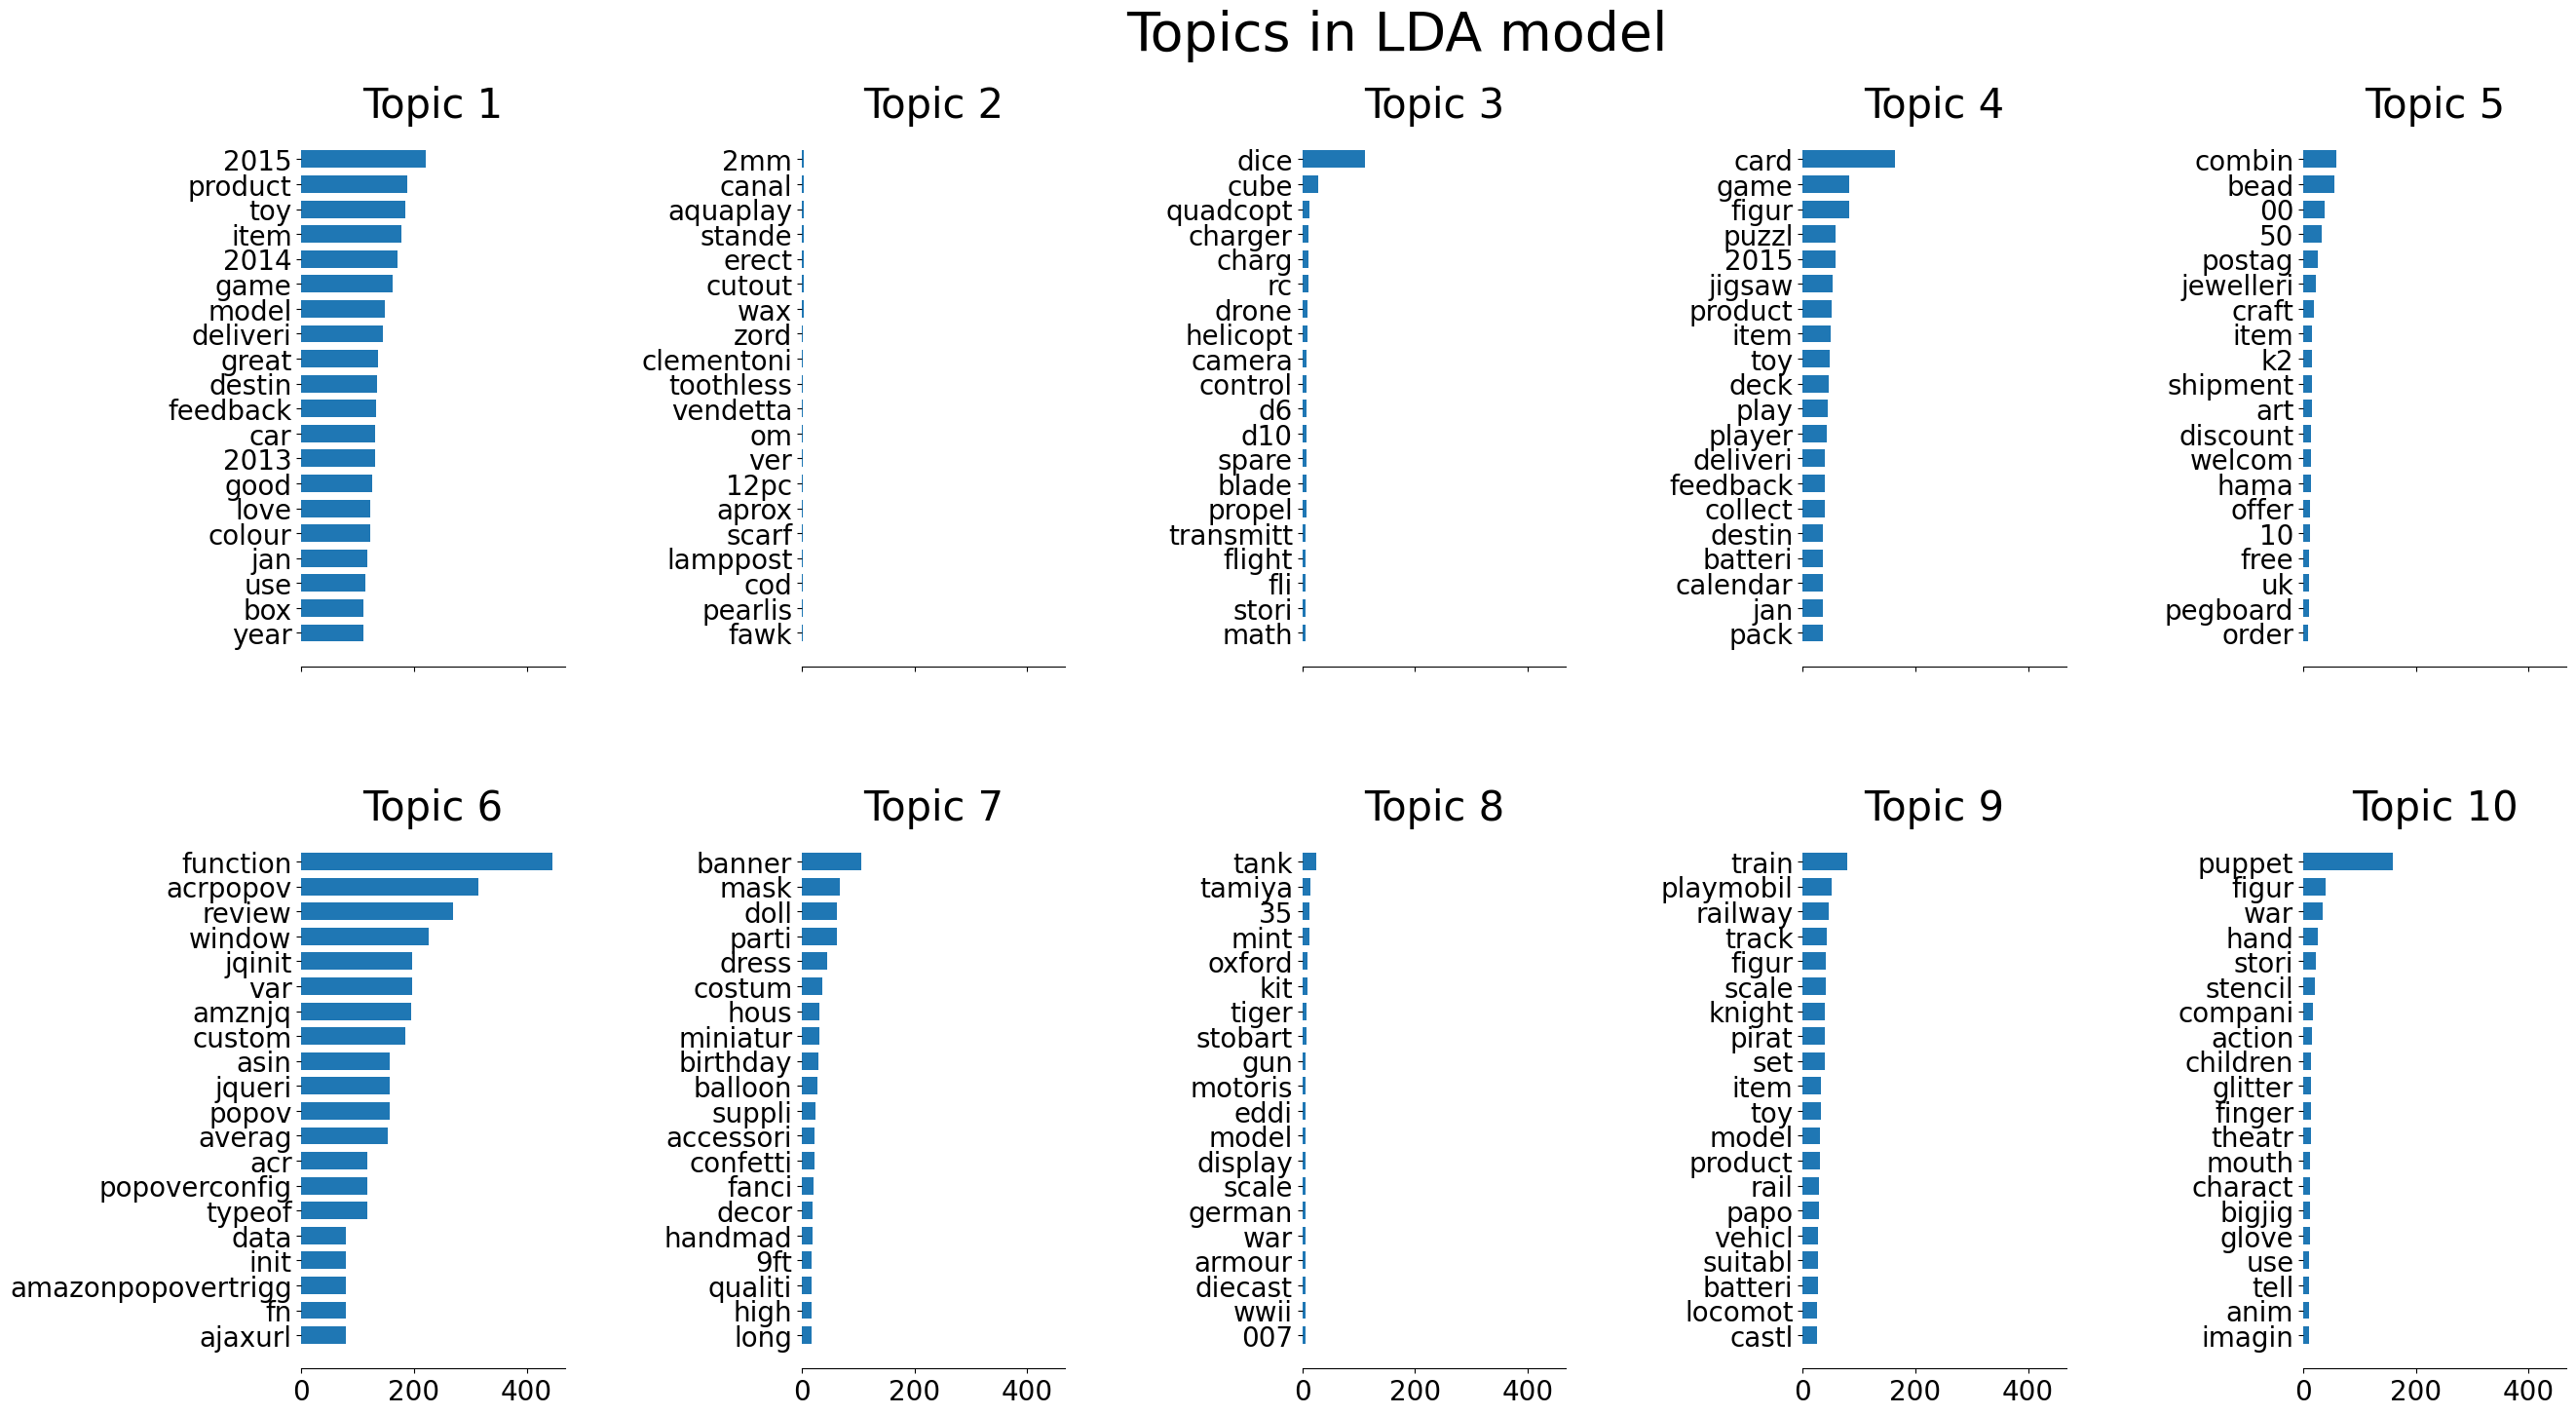

In [ ]:
plot_top_words_per_topic(
    lda,
    feature_names=vectorizer.get_feature_names_out(),
    n_top_words=20,
    title="Topics in LDA model"
)

In [ ]:
# Item-to-Item Based Collaborative Filtering

# - This represents "content based" filtering
# - We can use a "memory based approach" which simulates something like KNN to recomment items
# - We can also uses a "model based approach" which uses DNNs to find similarities

# - https://medium.com/sciforce/inside-recommendations-how-a-recommender-system-recommends-9afc0458bd8f
# - https://medium.com/sciforce/deep-learning-based-recommender-systems-b61a5ddd5456
# - https://towardsdatascience.com/recommendation-system-series-part-6-the-6-variants-of-autoencoders-for-collaborative-filtering-bd7b9eae2ec7

# - https://www.amazon.science/the-history-of-amazons-recommendation-algorithm
# - https://en.wikipedia.org/wiki/Item-item_collaborative_filtering
# - https://www.geeksforgeeks.org/item-to-item-based-collaborative-filtering/
# - https://en.wikipedia.org/wiki/Autoencoder